In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('vendas_cursos.csv')
df

,ID,Nome do Curso,Quantidade de Vendas,Preço Unitário,Data
0,1,Introdução à Programação em Python,50,39.9,2023-01-01
1,2,Desenvolvimento Web com HTML e CSS,30,59.9,2023-01-02
2,3,JavaScript Avançado: Frameworks e Bibliotecas,20,79.9,2023-01-03
3,4,Introdução ao Machine Learning,15,99.9,2023-01-04
4,5,Desenvolvimento Mobile com React Native,25,69.9,2023-01-05
5,6,Arquitetura de Microserviços,12,89.9,2023-01-06
6,7,Banco de Dados SQL e NoSQL,18,79.9,2023-01-07
7,8,Segurança da Informação: Fundamentos,10,109.9,2023-01-08
8,9,Cloud Computing com AWS,22,99.9,2023-01-09
9,10,DevOps: Integração e Entrega Contínua,8,119.9,2023-01-10


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    25 non-null     int64  
 1   Nome do Curso         25 non-null     object 
 2   Quantidade de Vendas  25 non-null     int64  
 3   Preço Unitário        25 non-null     float64
 4   Data                  25 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ KB
None


In [4]:
# Agrupar por nome do curso e calcular a quantidade total de vendas e a receita total
df_agrupado = df.groupby('Nome do Curso').agg({
    'Quantidade de Vendas': 'sum',
    'Preço Unitário': 'mean'  
}).reset_index()

# Calcular a receita total
df_agrupado['Receita Total'] = df_agrupado['Quantidade de Vendas'] * df_agrupado['Preço Unitário']

# Ordenar pelo valor da receita total em ordem decrescente
df_agrupado = df_agrupado.sort_values(by='Receita Total', ascending=False)

# Exibir os dados agrupados
print(df_agrupado)

                                   Nome do Curso  Quantidade de Vendas  \
4             Desenvolvimento Web com HTML e CSS                    75   
3        Desenvolvimento Mobile com React Native                    63   
8  JavaScript Avançado: Frameworks e Bibliotecas                    53   
7             Introdução à Programação em Python                    95   
6                 Introdução ao Machine Learning                    37   
2                        Cloud Computing com AWS                    37   
0                   Arquitetura de Microserviços                    30   
1                     Banco de Dados SQL e NoSQL                    30   
5          DevOps: Integração e Entrega Contínua                    14   
9           Segurança da Informação: Fundamentos                    15   

   Preço Unitário  Receita Total  
4            59.9         4492.5  
3            69.9         4403.7  
8            79.9         4234.7  
7            39.9         3790.5  
6         

### Estatísticas Descritivas

In [5]:
# Calcular estatísticas descritivas
estatisticas_descritivas = df_agrupado[['Quantidade de Vendas', 'Preço Unitário', 'Receita Total']].describe()

print(estatisticas_descritivas)



       Quantidade de Vendas  Preço Unitário  Receita Total
count              10.00000       10.000000       10.00000
mean               44.90000       84.900000     3273.51000
std                26.30357       24.152295     1085.09921
min                14.00000       39.900000     1648.50000
25%                30.00000       72.400000     2472.00000
50%                37.00000       84.900000     3696.30000
75%                60.50000       99.900000     4123.65000
max                95.00000      119.900000     4492.50000


### Análise de Dados

In [6]:
# Gráfico de barras para contagem de categorias
# Quantidade de Vendas x Curso



# Ordenar os dados pela quantidade de vendas
df_agrupado = df_agrupado.sort_values(by='Quantidade de Vendas', ascending=False)

# Criar o gráfico de barras interativo com Plotly
fig = px.bar(df_agrupado, x='Nome do Curso', y='Quantidade de Vendas',
            labels={'Quantidade de Vendas': 'Quantidade de Vendas'},
            title='Quantidade de Vendas por Curso')

# Ajustar o tamanho do gráfico
fig.update_layout(width=1000, height=600)

# Adicionar quebra de linha nos nomes dos cursos
fig.update_xaxes(tickangle=-45, tickfont=dict(size=10))

# Adicionar rótulos aos dados e diminuir o tamanho da fonte
fig.update_traces(text=df_agrupado['Quantidade de Vendas'].values,
                textposition='outside',
                textfont=dict(size=8))

fig.show()




In [7]:


# Ordenar os dados pelo valor da receita total em ordem decrescente
df_agrupado = df_agrupado.sort_values(by='Receita Total', ascending=False)

# Criar o gráfico de barras interativo com Plotly
fig = px.bar(df_agrupado, x='Nome do Curso', y='Receita Total',
             labels={'Receita Total': 'Receita Total'},
             title='Receita Total por Curso')

# Ajustar o tamanho do gráfico
fig.update_layout(width=1000, height=600)

# Adicionar quebra de linha nos nomes dos cursos
fig.update_xaxes(tickangle=-45, tickfont=dict(size=10))

# Adicionar rótulos aos dados e diminuir o tamanho da fonte
fig.update_traces(text=df_agrupado['Receita Total'].values.round(2),
                  textposition='outside',
                  textfont=dict(size=8))

# Exibir o gráfico
fig.show()




In [8]:
import plotly.express as px

# Criar o gráfico de dispersão com Plotly
fig = px.scatter(df_agrupado, x='Preço Unitário', y='Quantidade de Vendas', 
                size='Quantidade de Vendas', color='Nome do Curso',
                hover_name='Nome do Curso', log_x=True, size_max=30,
                labels={'Preço Unitário': 'Preço Unitário', 'Quantidade de Vendas': 'Quantidade de Vendas'},
                title='Relação entre Preço Unitário e Quantidade de Vendas')

# Ajustar o tamanho do gráfico
fig.update_layout(width=1000, height=600)


fig.show()


In [9]:
# Criar uma tabela com os dados
tabela_receita = df_agrupado[['Nome do Curso', 'Receita Total']]

# Exibir a tabela
print(tabela_receita)


                                   Nome do Curso  Receita Total
4             Desenvolvimento Web com HTML e CSS         4492.5
3        Desenvolvimento Mobile com React Native         4403.7
8  JavaScript Avançado: Frameworks e Bibliotecas         4234.7
7             Introdução à Programação em Python         3790.5
6                 Introdução ao Machine Learning         3696.3
2                        Cloud Computing com AWS         3696.3
0                   Arquitetura de Microserviços         2697.0
1                     Banco de Dados SQL e NoSQL         2397.0
5          DevOps: Integração e Entrega Contínua         1678.6
9           Segurança da Informação: Fundamentos         1648.5


In [10]:
# Calcular a receita total 
receita_total = df_agrupado['Receita Total'].sum()

print(f"Receita Total: R${receita_total:.2f}")


Receita Total: R$32735.10


In [11]:
# Identificar o curso com a maior receita
curso_maior_receita = df_agrupado.loc[df_agrupado['Receita Total'].idxmax(), 'Nome do Curso']
# Valor da receita do curso com maior receita
valor_maior_receita = df_agrupado['Receita Total'].max()


print(f"Curso com maior receita: {curso_maior_receita}")
print(f"Valor da receita: R${valor_maior_receita:.2f}")


Curso com maior receita: Desenvolvimento Web com HTML e CSS
Valor da receita: R$4492.50


In [12]:
# Identificar o curso com o maior número de vendas
curso_maior_vendas = df_agrupado.loc[df_agrupado['Quantidade de Vendas'].idxmax(), 'Nome do Curso']
# Quantidade de vendas do curso com maior número de vendas
quantidade_maior_vendas = df_agrupado['Quantidade de Vendas'].max()


print(f"Curso com maior número de vendas: {curso_maior_vendas}")
print(f"Quantidade de vendas: {quantidade_maior_vendas}")


Curso com maior número de vendas: Introdução à Programação em Python
Quantidade de vendas: 95


In [13]:
# Converter a coluna 'Data' para o tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

# Agrupar os dados por data e calcular a quantidade total de vendas
vendas_por_data = df.groupby('Data')['Quantidade de Vendas'].sum().reset_index()

# Criar o gráfico de linha interativo com Plotly
fig = px.line(vendas_por_data, x='Data', y='Quantidade de Vendas',
            labels={'Quantidade de Vendas': 'Quantidade de Vendas', 'Data': 'Data'},
            title='Distribuição das Vendas ao Longo do Tempo')

# Ajustar o tamanho do gráfico
fig.update_layout(width=1000, height=600)


fig.show()


In [15]:
# Certifique-se de que a coluna 'Data' está no formato datetime
df['Data'] = pd.to_datetime(df['Data'])

# Criar o gráfico de linha para cada curso ao longo do tempo
fig = px.line(df, x='Data', y='Quantidade de Vendas', color='Nome do Curso',
            labels={'Quantidade de Vendas': 'Quantidade de Vendas', 'Data': 'Data'},
            title='Distribuição das Vendas ao Longo do Tempo para Cada Curso')

# Ajustar o tamanho do gráfico
fig.update_layout(width=1000, height=600)

# Exibir o gráfico
fig.show()


### Análise de Correlação

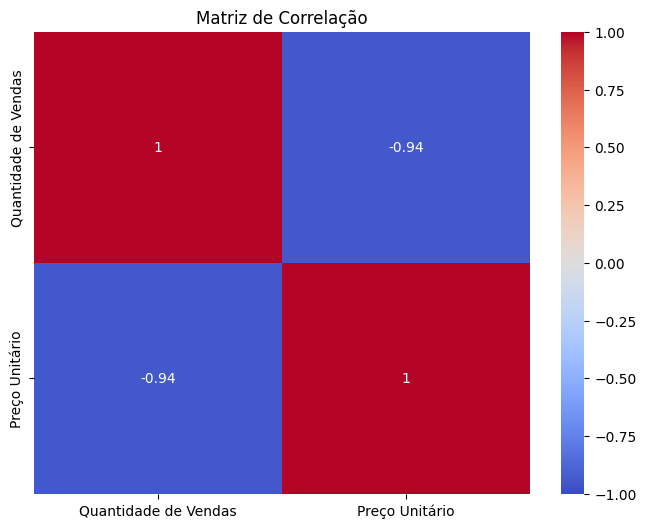

In [17]:
# Dados do df_agrupado
df_agrupado = pd.DataFrame({
    'Nome do Curso': [
        'Desenvolvimento Web com HTML e CSS',
        'Desenvolvimento Mobile com React Native',
        'JavaScript Avançado: Frameworks e Bibliotecas',
        'Introdução à Programação em Python',
        'Introdução ao Machine Learning',
        'Cloud Computing com AWS',
        'Arquitetura de Microserviços',
        'Banco de Dados SQL e NoSQL',
        'DevOps: Integração e Entrega Contínua',
        'Segurança da Informação: Fundamentos'
    ],
    'Quantidade de Vendas': [75, 63, 53, 95, 37, 37, 30, 30, 14, 15],
    'Preço Unitário': [59.9, 69.9, 79.9, 39.9, 99.9, 99.9, 89.9, 79.9, 119.9, 109.9]
})

# Calcular a matriz de correlação
correlation_matrix = df_agrupado[['Quantidade de Vendas', 'Preço Unitário']].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()


Ao analisar a correlação entre o preço dos cursos e a quantidade de vendas, observamos uma relação forte e negativa. Isso significa que cursos com preços mais altos tendem a ter menos vendas, enquanto cursos com preços mais baixos geralmente têm mais vendas. Essa informação é crucial para ajustar nossas estratégias de precificação e marketing, visando otimizar as vendas dos cursos.